In [59]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [201]:
import pandas as pd
dataset = pd.read_csv(root_dir + './Data_preprocessed.csv')

In [202]:
dataset.head(5)

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,Rapid increase in population and decline in cu...
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,Internet of things (IoT) is the most prominent...
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,This thesis presents the nonlinear optical beh...


In [203]:
dataset.shape

(17293, 8)

In [204]:
dataset['word_count'] = dataset['Abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['Abstract','word_count']].head()

,Abstract,word_count
0,Zero-shot learning is the problem of learning ...,304
1,"In the current world, the major focus is on th...",503
2,Rapid increase in population and decline in cu...,278
3,Internet of things (IoT) is the most prominent...,259
4,This thesis presents the nonlinear optical beh...,128


In [205]:
dataset.word_count.describe()

count    17293.000000
mean       331.775921
std        324.931056
min         11.000000
25%        175.000000
50%        246.000000
75%        343.000000
max       8137.000000
Name: word_count, dtype: float64

In [206]:
#find 50 most frequent words in the dataset and delete them (stop_words)
freq = pd.Series(' '.join(dataset['Abstract']).split()).value_counts()[:50]
freq = list(freq.index)

In [207]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [208]:
stop_words = set(stopwords.words("english"))

In [209]:
stop_words = stop_words.union(freq)
len(stop_words)

197

Perform Stemming + Lemmatisation

In [210]:
corpus = []
for i in range(0, dataset.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    """
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
    text = " ".join(text)
    """
    corpus.append(text)

In [211]:
len(corpus)

17293

In [212]:
corpus[0]

'zero shot learning is the problem of learning to classify objects from classes that were not available at training time essentially zero shot learning assumes that the model is trained using labeled data from some seen classes and the test examples some all can potentially come from unseen classes that were not present at training time this thesis develops novel generative models to solve this problem in principled ways generative models are appealing for this problem for several reasons in particular they help model the underlying distribution of classes in a natural way and can be used to generate data of any class at will by learning a class conditioned generative model which only requires specifying some externally provided class attributes features we first present a simple generative model which models each class by an exponential family distribution conditioned on the class attributes and will show how this incredibly simple construction can lead to highly effective and extensi

In [213]:
dataset['Corpus'] = corpus

In [214]:
dataset.head(5)

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract,word_count,Corpus
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,304,zero shot learning is the problem of learning ...
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",503,in the current world the major focus is on the...
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,Rapid increase in population and decline in cu...,278,rapid increase in population and decline in cu...
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,Internet of things (IoT) is the most prominent...,259,internet of things iot is the most prominent t...
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,This thesis presents the nonlinear optical beh...,128,this thesis presents the nonlinear optical beh...


In [215]:
dataset['word_count_corpus'] = dataset['Corpus'].apply(lambda x: len(str(x).split(" ")))

In [216]:
dataset[['Abstract', 'Corpus', 'word_count', 'word_count_corpus']].head()

,Abstract,Corpus,word_count,word_count_corpus
0,Zero-shot learning is the problem of learning ...,zero shot learning is the problem of learning ...,304,326
1,"In the current world, the major focus is on th...",in the current world the major focus is on the...,503,518
2,Rapid increase in population and decline in cu...,rapid increase in population and decline in cu...,278,280
3,Internet of things (IoT) is the most prominent...,internet of things iot is the most prominent t...,259,279
4,This thesis presents the nonlinear optical beh...,this thesis presents the nonlinear optical beh...,128,135


In [217]:
dataset.describe()

,Unnamed: 0,word_count,word_count_corpus
count,17293.000000,17293.000000,17293.000000
mean,8792.003180,331.775921,327.419071
std,5158.247395,324.931056,304.644921
min,0.000000,11.000000,12.000000
25%,4326.000000,175.000000,176.000000
50%,8681.000000,246.000000,248.000000
75%,13191.000000,343.000000,344.000000
max,17983.000000,8137.000000,7105.000000


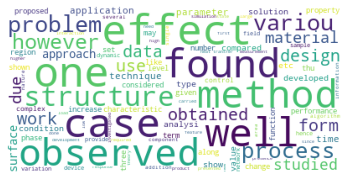

In [125]:
#word cloud of the entire dataset (according to most frequent words)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(    background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

TF-IDF

In [221]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv = CountVectorizer(stop_words=stop_words)
#cv = CountVectorizer(stop_words=stop_words)
X = cv.fit_transform(corpus)

In [222]:
X

<17293x112882 sparse matrix of type '<class 'numpy.int64'>'
	with 2018312 stored elements in Compressed Sparse Row format>

In [220]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names = cv.get_feature_names()
feature_names

['aa',
 'aaa',
 'aaaa',
 'aaaaigs',
 'aaaignment',
 'aaain',
 'aaann',
 'aaaociatad',
 'aaas',
 'aab',
 'aac',
 'aacfs',
 'aachen',
 'aad',
 'aada',
 'aading',
 'aadt',
 'aadverse',
 'aae',
 'aag',
 'aage',
 'aahp',
 'aain',
 'aaiswer',
 'aakes',
 'aal',
 'aalap',
 'aalb',
 'aalin',
 'aalso',
 'aalst',
 'aam',
 'aame',
 'aamic',
 'aamir',
 'aams',
 'aan',
 'aand',
 'aandg',
 'aanual',
 'aao',
 'aap',
 'aaphson',
 'aappropriate',
 'aaq',
 'aaqms',
 'aar',
 'aarogyasri',
 'aaroh',
 'aaron',
 'aaronautlcal',
 'aaronson',
 'aas',
 'aasand',
 'aasho',
 'aashto',
 'aat',
 'aatp',
 'aav',
 'aavaral',
 'aawlf',
 'aawnchronoua',
 'ab',
 'aba',
 'abab',
 'abackup',
 'abacus',
 'abad',
 'abadie',
 'abandon',
 'abandoned',
 'abandonee',
 'abandonment',
 'abandwidth',
 'abank',
 'abanyan',
 'abaqus',
 'abarrel',
 'abasal',
 'abase',
 'abased',
 'abastract',
 'abate',
 'abatement',
 'abatementprogrammes',
 'abb',
 'abba',
 'abbe',
 'abbeys',
 'abbott',
 'abbreviate',
 'abbreviated',
 'abbreviating',

In [180]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature, score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]
    
    return results

In [181]:
abstract_new = []
for i in range(len(corpus)):
  # fetch document for which keywords needs to be extracted
  doc = corpus[i]

  #generate tf-idf for the given document
  tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))

  #sort the tf-idf vectors by descending order of scores
  sorted_items = sort_coo(tf_idf_vector.tocoo())

  #extract only the top n
  keywords = extract_topn_from_vector(feature_names, sorted_items, 50)
  
  #now print the results
  abstract_new.append(list(keywords.keys()))

len(abstract_new)

17293

In [182]:
dataset['Abstract_Topn'] = abstract_new

In [183]:
dataset.head(10)

,Unnamed: 0,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract,word_count,Corpus,word_count_corpus,Abstract_Topn
0,0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,304,zero shot learning problem learning classify o...,180,"[class, learning, generative, shot, deep, zero..."
1,1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",503,current world major focus designing material a...,282,"[material, recrystallization, ductility, cgp, ..."
2,2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,Rapid increase in population and decline in cu...,278,rapid increase population decline cultivated l...,171,"[soil, nir, nutrient, fertilizer, device, heal..."
3,3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,Internet of things (IoT) is the most prominent...,259,internet thing iot prominent technology fth ge...,158,"[sensor, fusion, constraint, snr, technology, ..."
4,4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,This thesis presents the nonlinear optical beh...,128,thesis present nonlinear optical behavior meth...,83,"[nonlinear, methanol, laser, beam, optical, sc..."
5,5,12-Sep-2020,Strain Engineering Ferroic Properties in Two-D...,"Mahajan, Akshay","Bhowmick, Somnath",M.TECH.,MSE,Two-dimensional (2D) ferroic materials have a ...,208,dimensional ferroic material special place fam...,135,"[ferroelectric, material, strain, ferroic, mul..."
6,6,10-Sep-2020,Development of Lead Free Organometallic Halide...,"Kumar, Prashant","Maiti, Tanmoy",M.TECH.,MSE,Perovskite based solar cell (PSC) has generate...,280,perovskite solar cell psc generated lot intere...,186,"[perovskites, perovskite, inorganic, pscs, met..."
7,7,10-Sep-2020,Channel Estimation in mmWave MIMO-OFDM systems...,"Nath, Jaitra","Jagannatham, Aditya K",M.TECH.,EE,Channel estimation is pivotal in millimetre wa...,211,channel estimation pivotal millimetre wave mmw...,144,"[mmwave, channel, estimation, pilot, signal, b..."
8,8,8-Sep-2020,Improving Legal Statute Retrieval using Releva...,"Joshi, Shashank","Bhattacharya, Arnab",M.TECH.,CSE,Legal statute retrieval is a novel Information...,157,legal statute retrieval novel information retr...,88,"[statute, retrieval, legal, corpus, law, task,..."
9,9,7-Sep-2020,Computational study of flow field and associat...,"Sinha, Anshuman","Singh, Amarendra Kumar",M.TECH.,MSE,The demand for quality steel is becoming more ...,180,demand quality steel becoming stringent modern...,93,"[desulfurisation, ppm, ladle, slag, steel, flu..."


In [134]:
#dataset.drop(['Unnamed: 0', 'Abstract', 'word_count', 'Corpus', 'word_count_corpus'], axis=1, inplace=True)

In [135]:
#dataset.columns

Index(['Submission Date', 'Title', 'Author', 'Supervisor', 'Degree',
       'Department', 'Abstract_Topn'],
      dtype='object')

In [151]:
#dataset.head(10)

,Submission Date,Title,Author,Supervisor,Degree,Department,Abstract_Topn
0,30-Sep-2020,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,"[class, learning, generative, shot, deep, zero..."
1,24-Sep-2020,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"[material, recrystallization, ductility, cgp, ..."
2,19-Sep-2020,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,"[soil, nir, nutrient, fertilizer, device, heal..."
3,15-Sep-2020,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,"[sensor, fusion, constraint, snr, technology, ..."
4,15-Sep-2020,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,"[nonlinear, methanol, laser, beam, optical, sc..."
5,12-Sep-2020,Strain Engineering Ferroic Properties in Two-D...,"Mahajan, Akshay","Bhowmick, Somnath",M.TECH.,MSE,"[ferroelectric, material, strain, ferroic, mul..."
6,10-Sep-2020,Development of Lead Free Organometallic Halide...,"Kumar, Prashant","Maiti, Tanmoy",M.TECH.,MSE,"[perovskites, perovskite, inorganic, pscs, met..."
7,10-Sep-2020,Channel Estimation in mmWave MIMO-OFDM systems...,"Nath, Jaitra","Jagannatham, Aditya K",M.TECH.,EE,"[mmwave, channel, estimation, pilot, signal, b..."
8,8-Sep-2020,Improving Legal Statute Retrieval using Releva...,"Joshi, Shashank","Bhattacharya, Arnab",M.TECH.,CSE,"[statute, retrieval, legal, corpus, law, task,..."
9,7-Sep-2020,Computational study of flow field and associat...,"Sinha, Anshuman","Singh, Amarendra Kumar",M.TECH.,MSE,"[desulfurisation, ppm, ladle, slag, steel, flu..."


In [137]:
#dataset.to_csv('Data_topn.csv')

Generate WordClouds based on department

In [184]:
print(dataset.shape)
len(corpus)

(17293, 12)


17293

In [223]:
#Create a dictionary where key will be department name, value will be list of dataset indices of articles in that department
department_dict = {} 
for i in range(dataset.shape[0]):
  if dataset['Department'][i] not in department_dict.keys(): #initialize department index list if first occurence of department
    department_dict[dataset['Department'][i]] = []
  department_dict[dataset['Department'][i]].append(i)      

In [224]:
department_dict.keys()

dict_keys(['CSE', 'MSE', 'CHE', 'EE', 'CELP', 'EEMP', 'CE', 'MSP', 'DP', 'AE', 'IME', 'ME', 'CHM', 'BSBE', 'ES', 'HSS', 'PHY', 'MATH', 'NETP', 'ECO', 'MME', 'NET', 'EEM', 'MATH & STATS', 'DES', 'LT', '-', 'LTP', 'Civil'])

In [152]:
"""
#verify
index_count = 0
for key in department_dict.keys():
  index_count += len(department_dict[key])

index_count  
"""

17293

In [149]:
#combine the abstracts based on department name, find tf-idf values, select top 200 values, map them to a dictionary, and generate word cloud
for department in department_dict.keys():
  cv = CountVectorizer(max_df=0.8, stop_words=stop_words)
  corpus_dept = []
  for i in department_dict[department]:
    corpus_dept.append(corpus[i])

  X = cv.fit_transform(corpus_dept)

  tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
  tfidf_transformer.fit(X)
  feature_names = cv.get_feature_names()

  keywords_dict = {}
  for i in range(len(corpus_dept)):
    doc = corpus[i]
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    keywords = extract_topn_from_vector(feature_names, sorted_items, 30)
    keywords_dict.update(keywords)

  

0

In [225]:
c = 0
for i in range(dataset.shape[0]):
  if i in department_dict['CSE']:
    if dataset['Department'][i] == 'CSE':
      c += 1
c, len(department_dict['CSE'])      

(1565, 1565)

In [226]:
department = 'CSE'
cv = CountVectorizer(max_df=0.8, stop_words=stop_words)
corpus_dept = []
for i in department_dict[department]:
  corpus_dept.append(corpus[i])

X = cv.fit_transform(corpus_dept)

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)
feature_names = cv.get_feature_names()

keywords_dict = {}
for i in range(len(corpus_dept)):
  doc = corpus_dept[i]
  tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
  sorted_items = sort_coo(tf_idf_vector.tocoo())
  keywords = extract_topn_from_vector(feature_names, sorted_items, 30)
  keywords_dict.update(keywords)

In [227]:
len(keywords_dict)

15399

In [228]:
from collections import Counter
k = Counter(keywords_dict) 
high = k.most_common(30) 
high

[('tenant', 0.842),
 ('scilab', 0.792),
 ('gis', 0.789),
 ('icns', 0.764),
 ('theses', 0.76),
 ('mcsp', 0.742),
 ('antimatching', 0.731),
 ('residues', 0.73),
 ('joins', 0.718),
 ('geoftp', 0.714),
 ('keccak', 0.704),
 ('inventory', 0.704),
 ('mpeg', 0.704),
 ('closure', 0.703),
 ('cobal', 0.694),
 ('auction', 0.692),
 ('tal', 0.69),
 ('cipher', 0.689),
 ('oram', 0.684),
 ('trees', 0.682),
 ('osd', 0.671),
 ('ear', 0.659),
 ('authorization', 0.659),
 ('fotol', 0.655),
 ('ipv', 0.65),
 ('thank', 0.645),
 ('ciphertext', 0.643),
 ('skyline', 0.641),
 ('atm', 0.639),
 ('ecg', 0.638)]

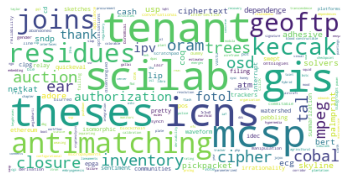

In [229]:
wordcloud = WordCloud(    background_color='white',
                          stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42,
                         ).generate_from_frequencies(keywords_dict)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

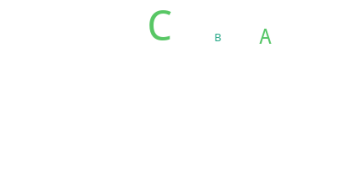

In [104]:
#word cloud of the entire dataset
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(    background_color='white',
                          stopwords=stop_words,
                          max_words=30,
                          max_font_size=50, 
                          random_state=42,
                         ).generate_from_frequencies(keywords)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()